In [ ]:
%matplotlib notebook
from ipywidgets import *

import os
import pandas as pd
import ast

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import numpy as np

import glob

%matplotlib inline

from my_library import *

In [2]:
data_directory = '../chess_resources/csv'

csv_files = glob.glob(data_directory + "/*.csv")
print("Found " + str(len(csv_files)) + " csv files")

constrains = []
for file in csv_files:
    constrains.append(file.split("/")[-1].split(".")[0])

# to python array
constrains = [ast.literal_eval(c) for c in constrains]

for c in constrains:
    print(c)

constraint_piece_indexes = {
    'queen': 0,
    'rook': 1,
    'bishop': 2,
    'knight': 3,
    'pawn': 4
}

# filter negligible values
treshold_percent = 0.05
print("\nSetting treshold for negligible values to " + str(treshold_percent) + "%")

Found 11 csv files
(1, 2, 2, 2, 7)
(1, 2, 2, 1, 8)
(1, 2, 1, 2, 8)
(1, 1, 2, 2, 8)
(0, 2, 2, 2, 8)
(1, 2, 1, 1, 8)
(1, 2, 2, 2, 6)
(1, 2, 2, 2, 5)
(1, 2, 1, 1, 6)
(1, 2, 2, 0, 6)
(1, 2, 0, 2, 6)

Setting treshold for negligible values to 0.05%


# Load All Constraints

In [3]:
dfs = {}

for file, constraint in zip(csv_files, constrains):
    print("Reading file " + file)
    df = pd.read_csv(file, sep=";")
    print('\tshape: ', df.shape)
    dfs[constraint] = df

one_df = dfs[(1, 2, 2, 2, 7)]
display("Displaying df format:")
display(one_df.head())
display(df.dtypes)

Reading file ../chess_resources/csv/(1, 2, 2, 2, 7).csv
	shape:  (6059578, 11)
Reading file ../chess_resources/csv/(1, 2, 2, 1, 8).csv
	shape:  (1240894, 11)
Reading file ../chess_resources/csv/(1, 2, 1, 2, 8).csv
	shape:  (1472879, 11)
Reading file ../chess_resources/csv/(1, 1, 2, 2, 8).csv
	shape:  (13477, 11)
Reading file ../chess_resources/csv/(0, 2, 2, 2, 8).csv
	shape:  (79555, 11)
Reading file ../chess_resources/csv/(1, 2, 1, 1, 8).csv
	shape:  (595408, 11)
Reading file ../chess_resources/csv/(1, 2, 2, 2, 6).csv
	shape:  (1690731, 11)
Reading file ../chess_resources/csv/(1, 2, 2, 2, 5).csv
	shape:  (300959, 11)
Reading file ../chess_resources/csv/(1, 2, 1, 1, 6).csv
	shape:  (1020538, 11)
Reading file ../chess_resources/csv/(1, 2, 2, 0, 6).csv
	shape:  (298405, 11)
Reading file ../chess_resources/csv/(1, 2, 0, 2, 6).csv
	shape:  (185363, 11)


'Displaying df format:'

,id,result,white_elo,black_elo,time_control,satisfied_after,queen_pos,rook_pos,bishop_pos,knight_pos,pawn_pos
0,2,1,1968,1893,300+0,7,"[3,]","[0,7,]","[2,5,]","[6,18,]","[8,9,12,13,14,15,27,]"
1,3,0,1204,1461,300+0,7,"[3,]","[0,7,]","[2,5,]","[1,21,]","[8,9,13,14,15,18,28,]"
2,4,1,1859,1772,600+0,5,"[3,]","[0,7,]","[2,5,]","[6,18,]","[8,9,10,11,14,15,28,]"
3,5,1,1882,1868,300+0,5,"[3,]","[0,7,]","[2,5,]","[1,21,]","[8,9,10,11,13,14,15,]"
4,6,1,1867,1905,600+0,5,"[3,]","[0,7,]","[2,5,]","[1,21,]","[8,9,11,12,13,15,22,]"


id                  int64
result              int64
white_elo           int64
black_elo           int64
time_control       object
satisfied_after     int64
queen_pos          object
rook_pos           object
bishop_pos         object
knight_pos         object
pawn_pos           object
dtype: object

# Removing Very Beginner Games

In [4]:
bad_game_elo_threshold = 1000
display('Removing games with white elo < ' + str(bad_game_elo_threshold))

for constraint, df in dfs.items():
    original_count = df.shape[0]
    df = df[df['white_elo'] > bad_game_elo_threshold]
    new_count = df.shape[0]
    print('Removed ' + str(original_count - new_count) + ' games out of ' + str(original_count) + ' (' + str(round((original_count - new_count) / original_count * 100, 2)) + '%)')

    dfs[constraint] = df

'Removing games with white elo < 1000'

Removed 29010 games out of 6059578 (0.48%)
Removed 8003 games out of 1240894 (0.64%)
Removed 7310 games out of 1472879 (0.5%)
Removed 417 games out of 13477 (3.09%)
Removed 1827 games out of 79555 (2.3%)
Removed 3046 games out of 595408 (0.51%)
Removed 9187 games out of 1690731 (0.54%)
Removed 2218 games out of 300959 (0.74%)
Removed 3235 games out of 1020538 (0.32%)
Removed 923 games out of 298405 (0.31%)
Removed 562 games out of 185363 (0.3%)


# Converting **arrays of positions** to python arrays

In [5]:
# first convert 'object' to arrays
arrays_columns = ['queen_pos', 'rook_pos', 'bishop_pos', 'knight_pos', 'pawn_pos']
#display(type(dfs[(1, 2, 2, 2, 7)]['queen_pos'][0]))

for constraint, df in dfs.items():
    for col in arrays_columns:
        df.loc[:, col] = df[col].apply(lambda x: ast.literal_eval(x))
    
    dfs[constraint] = df

#type(dfs[(1, 2, 2, 2, 7)]['queen_pos'][0])

# Analysing
## Correlation HeatMap

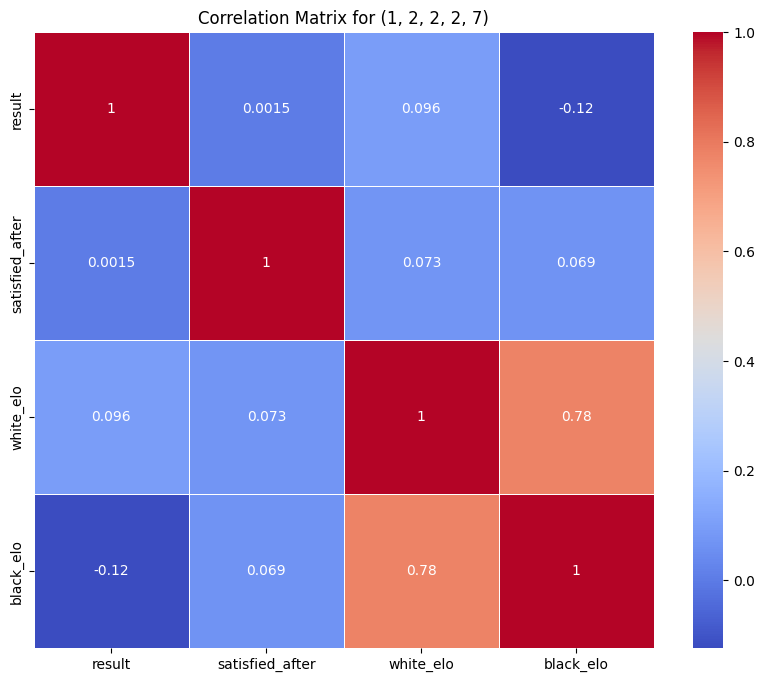

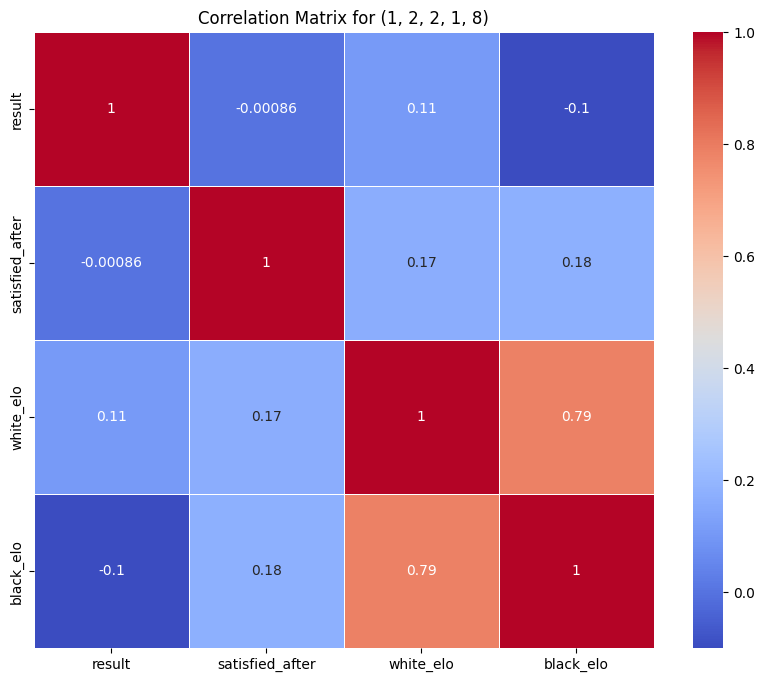

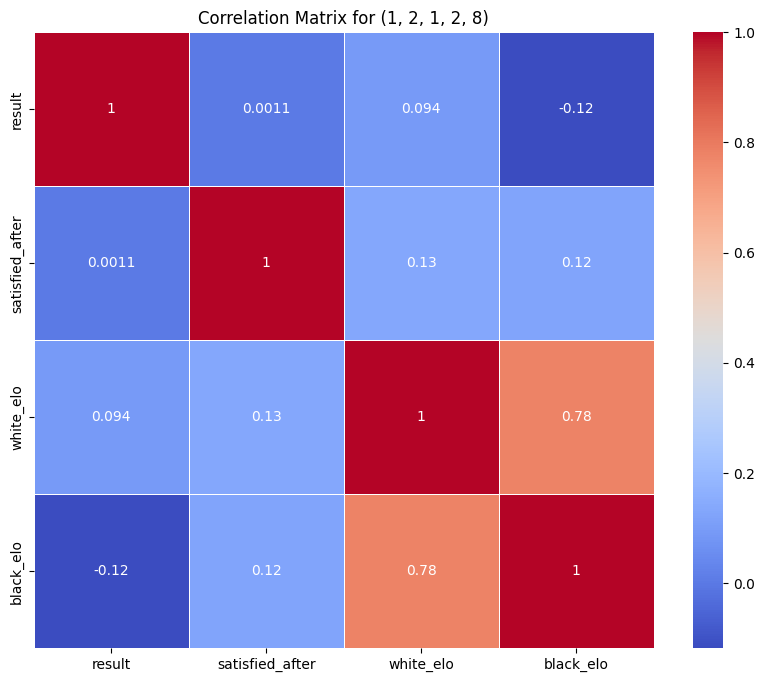

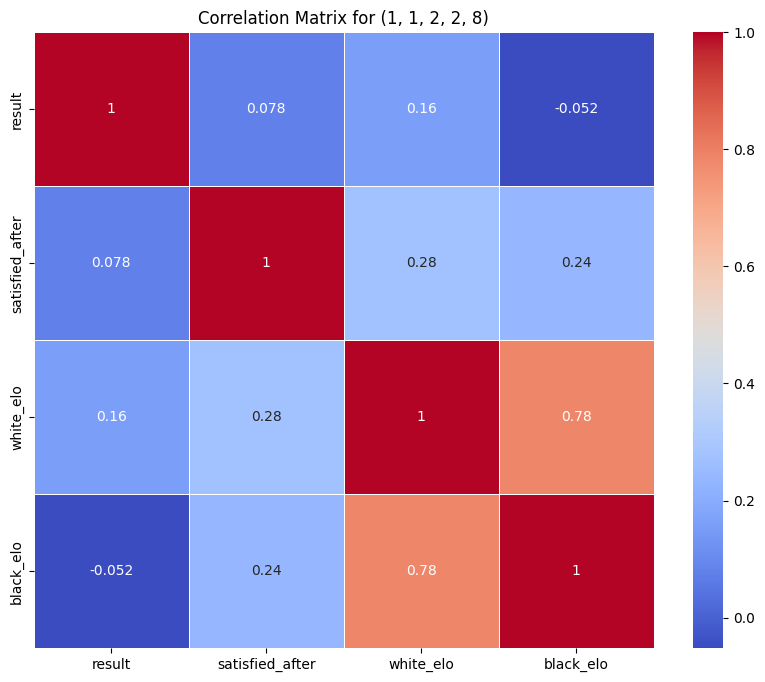

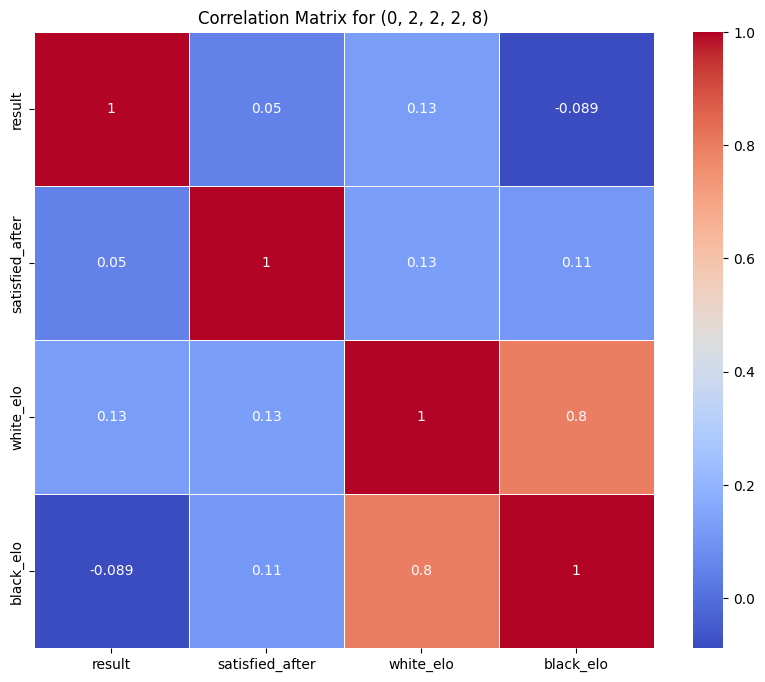

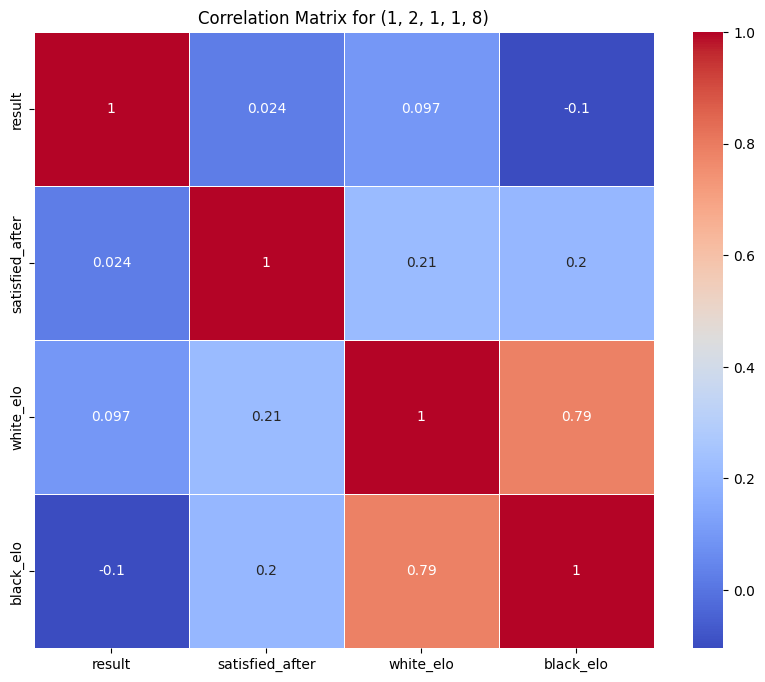

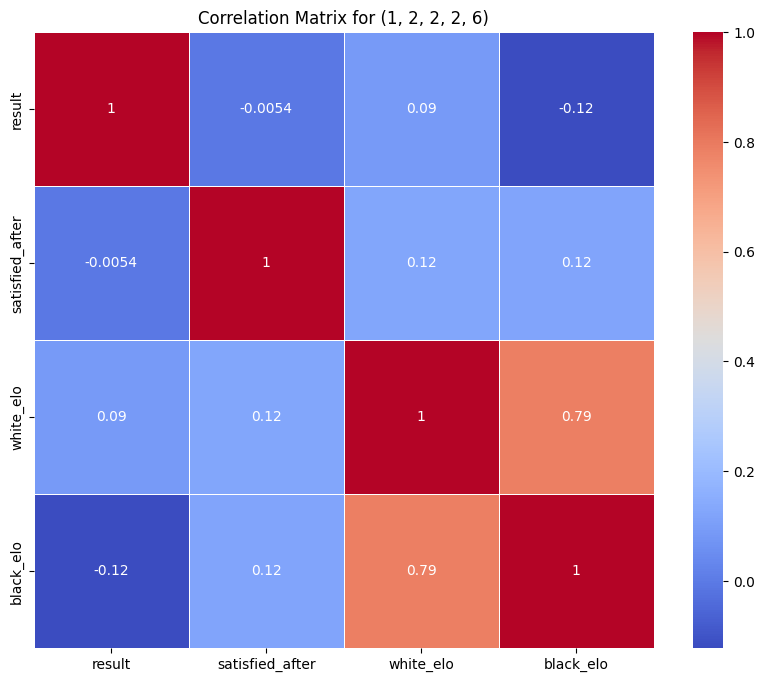

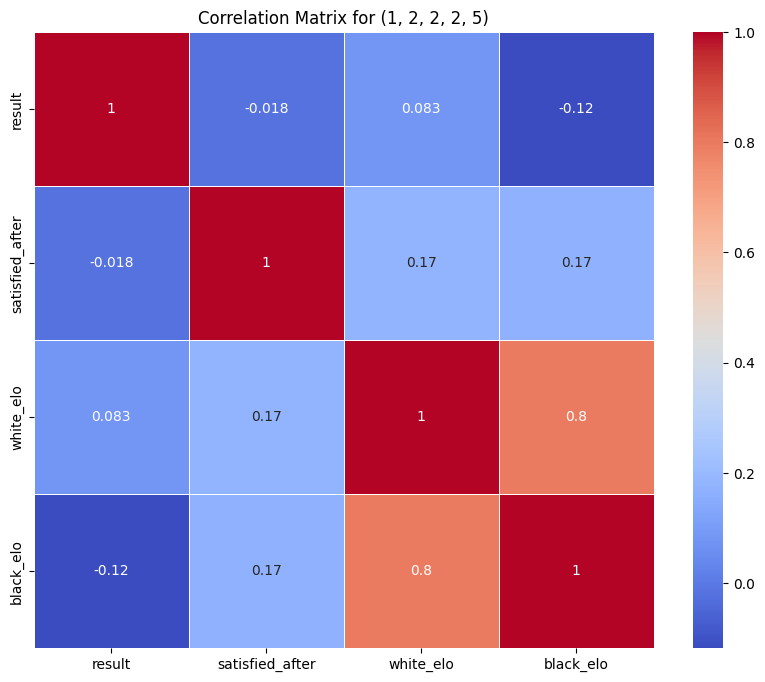

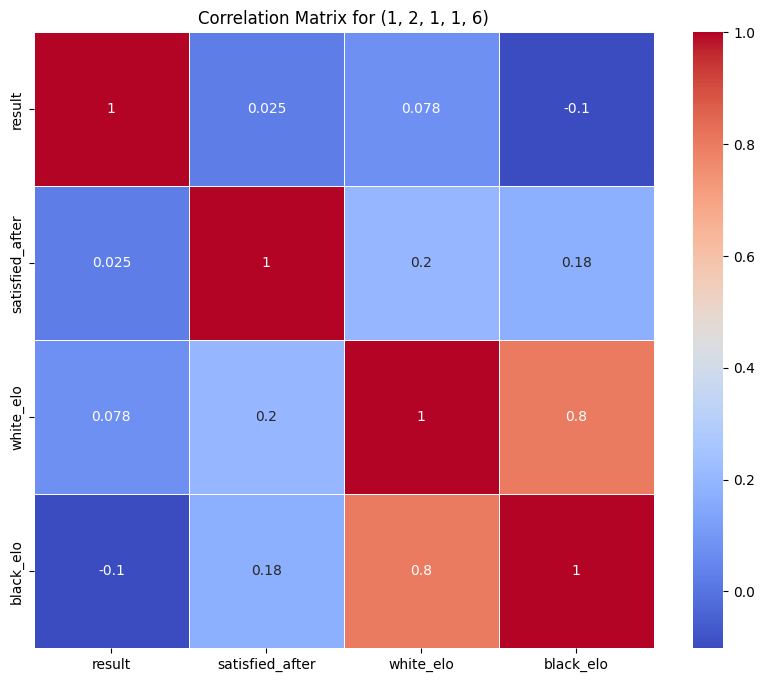

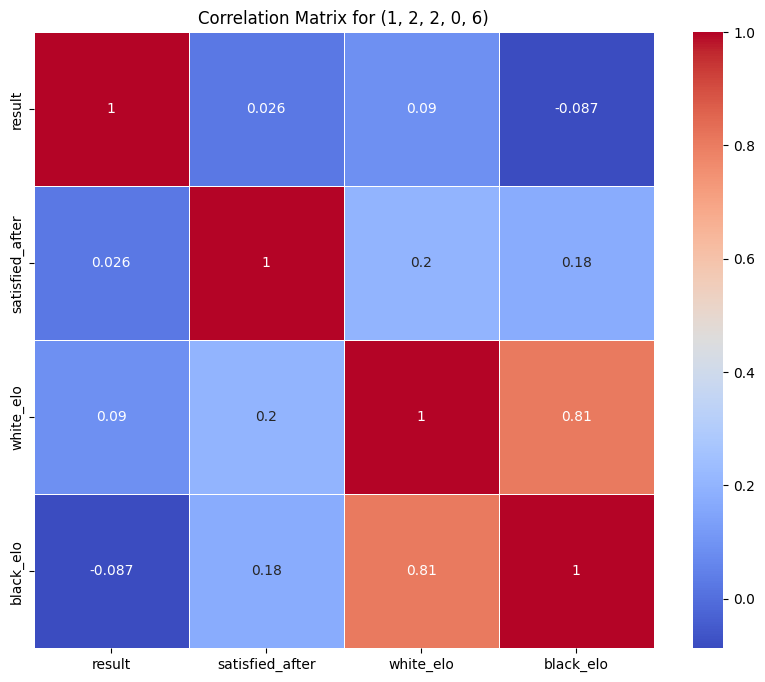

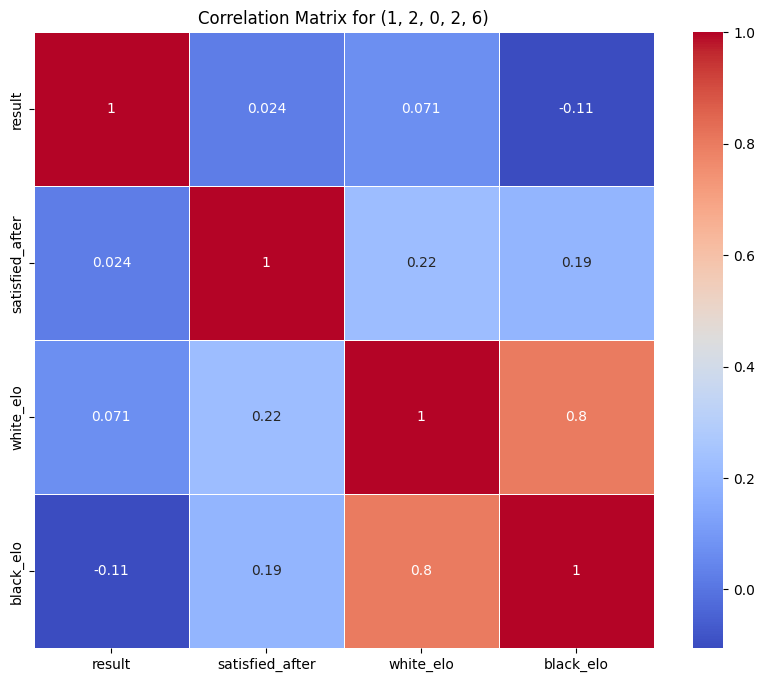

In [6]:
for constraint, df in dfs.items():
    corr_matrix = df[['result', 'satisfied_after', 'white_elo', 'black_elo']].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix for {constraint}')
    plt.show()

$=>$ Jeno **white_elo** a **black_elo** jsou korelované, ale to není překvapující. Mezi ostatními není žádná korelace.

## Drop unnecessary columns

In [7]:
columns_to_drop = ['id', 'white_elo', 'black_elo', 'time_control']
for constraint, df in dfs.items():
    df = df.drop(columns=columns_to_drop)
    dfs[constraint] = df

#display(dfs[(1, 2, 2, 2, 7)].head())

## Winning

,constraint,win,lost,draw
0,"(1, 2, 2, 2, 7)",0.496203,0.503797,0
1,"(1, 2, 2, 1, 8)",0.502010,0.497990,0
2,"(1, 2, 1, 2, 8)",0.480753,0.519247,0
3,"(1, 1, 2, 2, 8)",0.365314,0.634686,0
4,"(0, 2, 2, 2, 8)",0.421663,0.578337,0
5,"(1, 2, 1, 1, 8)",0.475864,0.524136,0
6,"(1, 2, 2, 2, 6)",0.492413,0.507587,0
7,"(1, 2, 2, 2, 5)",0.490485,0.509515,0
8,"(1, 2, 1, 1, 6)",0.451878,0.548122,0
9,"(1, 2, 2, 0, 6)",0.472876,0.527124,0


<Figure size 1000x600 with 0 Axes>

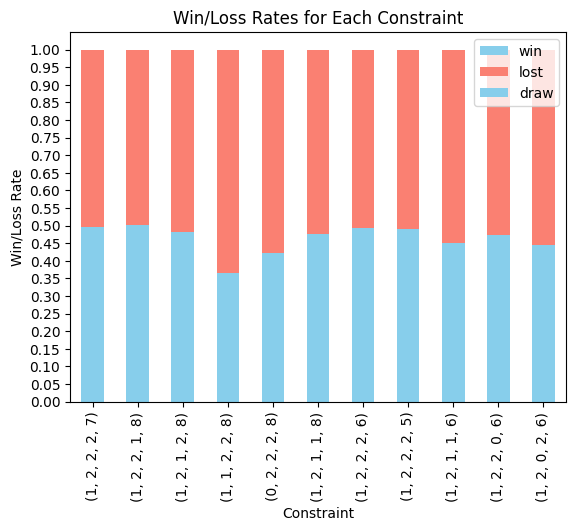

In [8]:
win_rate_df = pd.DataFrame(columns=['constraint', 'win', 'lost', 'draw'])
for constraint, df in dfs.items():
    value_counts = df['result'].value_counts()
    prob_distribution = value_counts / value_counts.sum()

    win_rate_df.loc[len(win_rate_df)] = [
        constraint,
        prob_distribution.get(1, default=0),
        prob_distribution.get(0, default=0),
        prob_distribution.get(1/2, default=0)
    ]

display(win_rate_df)

#------------------------------------------------------------
#display(df['result'].describe())
#------------------------------------------------------------

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
win_rate_df.plot(x='constraint', kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Win/Loss Rates for Each Constraint')
plt.xlabel('Constraint')
plt.ylabel('Win/Loss Rate')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

This implies the current constrain combination **Does Not AFFECT** chance to win. This make sense as it is only start of the game.

## Number of satisfied Move

(1, 2, 2, 2, 7) Negligible values: Index([ 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 39, 41, 43,
       45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 85],
      dtype='int64', name='satisfied_after')
(1, 2, 2, 1, 8) Negligible values: Index([41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 65, 67, 69, 77, 85, 89], dtype='int64', name='satisfied_after')
(1, 2, 1, 2, 8) Negligible values: Index([39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 75, 79, 81,
       85, 89, 93],
      dtype='int64', name='satisfied_after')
(1, 1, 2, 2, 8) Negligible values: Index([45, 47, 49, 51, 53], dtype='int64', name='satisfied_after')
(0, 2, 2, 2, 8) Negligible values: Index([41, 43, 45, 47, 49, 53, 57, 61], dtype='int64', name='satisfied_after')
(1, 2, 1, 1, 8) Negligible values: Index([5, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 79, 81, 87, 89], dtype='int64', name='satisfied_after')
(1, 2, 2, 2, 6) Negligible values: Index([12, 14, 16, 18, 20, 22, 24, 2

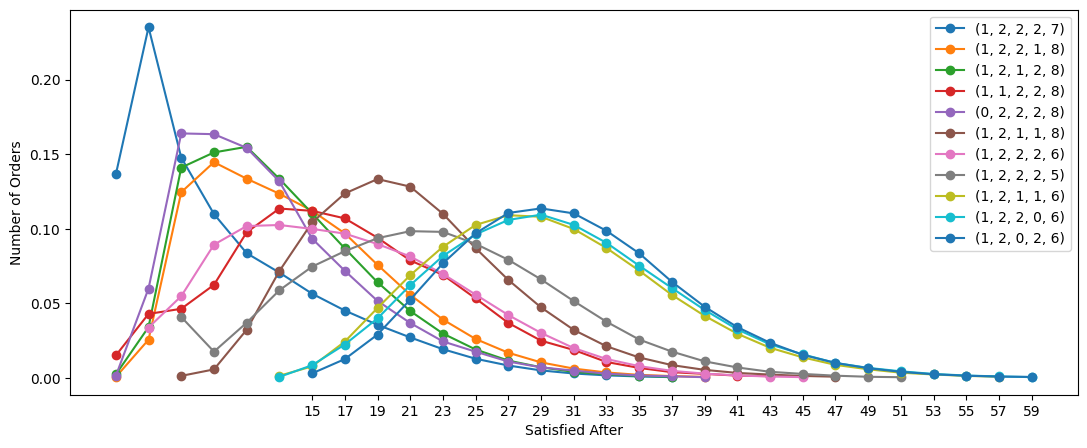

In [9]:
# display(df['satisfied_after'].describe())
# display('Median: ' + str(df['satisfied_after'].median()))

distributions = {}
for constraint, df in dfs.items():
    value_counts = df['satisfied_after'].value_counts()
    value_counts = value_counts.sort_index()

    threshold_value = (x;/100) * value_counts.sum()
    negligible_values = value_counts[value_counts <= threshold_value].index
    print(constraint, "Negligible values: " + str(negligible_values))

    value_counts = value_counts[value_counts > threshold_value]

    prob_distribution = value_counts / value_counts.sum()
    distributions[constraint] = prob_distribution

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))
for constraint, value_counts in distributions.items():
    axes.plot(value_counts.index, value_counts.values, marker='o', label=str(constraint))

plt.xlabel('Satisfied After')   
plt.ylabel('Number of Orders')
axes.set_xticks(value_counts.index)
plt.legend()
plt.show()

The reason why all values are odd is because it's always white's move.<br/><br/>
$=>$ This Constraint is satisfied after **10** moves on average and median of **7** moves.

<br/>




## Piece positions

In [10]:
import math

def show_chessboard_heatmap(columnName):
    piece_value_counts = []
    for constraint, df in dfs.items():
        value_counts = df[columnName].explode().value_counts()
        value_counts = value_counts / value_counts.sum()
        piece_value_counts.append(value_counts)

    total_piece_value_counts = pd.concat(piece_value_counts, axis=1).mean(axis=1)

    square_probabs = np.zeros((8, 8))
    for i in range(8):
        for j in range(8):
            square_number = i * 8 + j

            if square_number in total_piece_value_counts.index:
                square_probabs[i][j] = math.log(total_piece_value_counts[square_number] + 1)
            else:
                square_probabs[i][j] = 0

    square_probabs = np.flip(square_probabs, 0)

    heat_map = sns.heatmap(data=square_probabs, cmap='viridis', xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], yticklabels=['8', '7', '6', '5', '4', '3', '2', '1'])
    plt.show()

#### Queen


Negligible values: Index([[23], [29], [13], [63],  [1], [35], [50], [27], [36], [14], [49], [33],
       [34], [26], [47], [55], [16], [54], [25], [28], [40],  [9],  [5], [53],
       [37], [48], [15], [32], [42], [56],  [8],  [0], [46], [62], [45],  [6],
       [44], [43], [61], [58], [57], [41], [59], [52],  [7], [51], [60]],
      dtype='object', name='queen_pos')


/home/lukastp/gitlab/chess/notebooks/my_library.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, analyse_piece(df, column_name, threshold_percent)], ignore_index=True)


Negligible values: Index([[35], [26], [27], [47], [28], [53], [25], [16], [14], [36], [40], [54],
        [5], [37], [42],  [9], [55], [32], [15], [46], [48], [63], [56],  [8],
        [0], [34], [50], [45], [44], [41],  [6], [43], [62], [57], [60], [58],
       [52], [61], [51],  [7], [59]],
      dtype='object', name='queen_pos')
Negligible values: Index([[37], [53], [25], [35], [55], [26], [27], [63], [47], [54], [28], [16],
       [40], [14],  [8],  [5], [56], [15], [32], [50],  [9], [48], [42], [46],
       [34], [45], [62], [44],  [0], [43], [41],  [6], [61], [57], [58], [52],
       [51], [59],  [7]],
      dtype='object', name='queen_pos')
Negligible values: Index([[54], [27], [45], [44], [46], [42], [7], [58], [41], [62]], dtype='object', name='queen_pos')
Negligible values: Index([[45], [15], [50], [34],  [8], [43], [41], [62],  [0],  [6], [51], [57],
       [58], [52], [61], [60],  [7], [59]],
      dtype='object', name='queen_pos')
Negligible values: Index([[36], [47], [16]

,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps
33,[3],['d1'],0.629503,0.466421,0.533579,0.0,18.660835,17.0
3,[12],['e2'],0.060534,0.458217,0.541783,0.0,23.815740,22.0
2,[11],['d2'],0.055199,0.463099,0.536901,0.0,25.738470,24.0
1,[10],['c2'],0.044228,0.465902,0.534098,0.0,26.255254,25.0
13,[21],['f3'],0.036402,0.445246,0.554754,0.0,20.622744,18.0


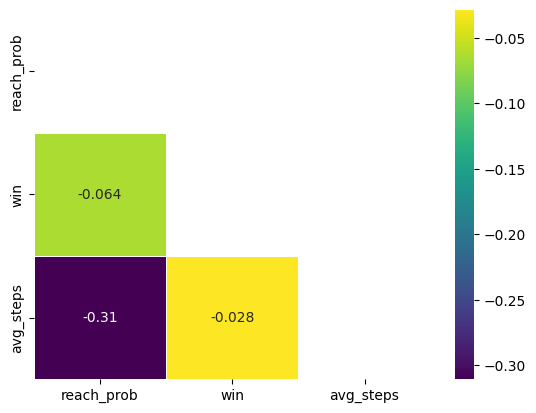

In [11]:
result_df = analyse_piece_over_all(dfs, 'queen_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
triangle = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=triangle, cmap='viridis', linewidths=0.5)
plt.show()

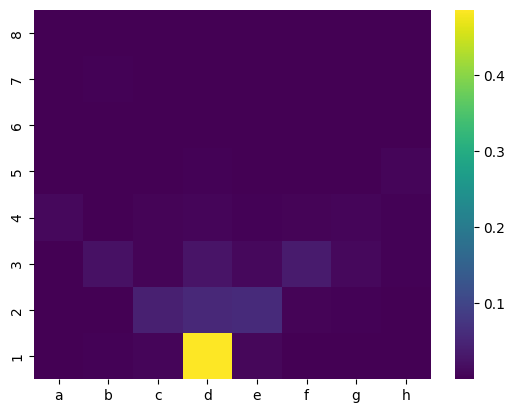

In [12]:
show_chessboard_heatmap('queen_pos')

$=>$ Vidíme, že ve většině případů se dáma nehne, zůstává na **d1(91%)** a v pak nejčastěji je na políčkách **c2(1.8%), d2(1.7%), e2(1.6%), f3(1.1%), b2(0.6%)**.\
Podíváme, jestli tyto nejčastější pozice nějak ovlivňují šanci na výhru:\
Vidíme, že dáma na políčkách **d1, c2, d2, e2 a b2** neovlivňuje šanci na výhru. Zato není zanedbatelný rozdíl **13% větší** šance na výhru, pokuď se nachází na **f3**. Je možné, že to je kvůli jednoduchému matu 3 tahy.

#### Rook

Negligible values: Index([  [4, 5],   [2, 3],  [0, 13],   [7, 8],  [0, 15],   [6, 7],   [3, 6],
        [0, 23],   [0, 2],   [5, 8],
       ...
        [8, 47],  [3, 39],  [5, 41], [10, 12],  [1, 19],  [7, 53], [18, 30],
        [5, 49], [24, 31],  [7, 58]],
      dtype='object', name='rook_pos', length=254)


/home/lukastp/gitlab/chess/notebooks/my_library.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, analyse_piece(df, column_name, threshold_percent)], ignore_index=True)


Negligible values: Index([  [2, 3],  [0, 13],   [7, 8],  [0, 15],   [5, 8],   [3, 6],  [0, 20],
         [6, 7],   [4, 7],  [0, 12],
       ...
       [23, 24],  [6, 22],  [7, 46],  [3, 20],  [6, 17],  [6, 11],  [8, 23],
        [3, 39],  [1, 14],   [6, 9]],
      dtype='object', name='rook_pos', length=174)
Negligible values: Index([[0, 15],  [4, 5], [0, 13],  [7, 8], [0, 23],  [6, 7], [0, 21],  [3, 6],
        [2, 3],  [5, 8],
       ...
       [0, 43], [2, 23], [4, 22], [4, 15], [7, 43], [3, 20],  [1, 9], [3, 22],
       [5, 14], [6, 31]],
      dtype='object', name='rook_pos', length=173)
Negligible values: Index([[19], [20], [17], [9], [18], [24], [22], [31], [14], [25], [12], [10]], dtype='object', name='rook_pos')
Negligible values: Index([  [3, 5],   [0, 3],  [0, 15],   [7, 8],   [4, 5],  [0, 23],   [2, 4],
         [0, 2],   [4, 7],   [1, 4],   [3, 6],  [0, 13],  [7, 16],   [2, 3],
        [0, 22],  [0, 21],   [5, 8],   [5, 7],  [0, 31],  [7, 22],   [6, 7],
        [0, 14],  [

,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps
20,"[0, 7]","['a1', 'h1']",0.544985,0.464529,0.535471,0.0,16.765593,15.0
21,[0],['a1'],0.485035,0.364082,0.635918,0.0,17.518987,17.0
73,[7],['h1'],0.389639,0.364585,0.635415,0.0,14.199527,13.0
18,"[0, 5]","['a1', 'f1']",0.268637,0.480408,0.519592,0.0,22.844358,22.0
64,[5],['f1'],0.079662,0.364162,0.635838,0.0,21.346821,21.0


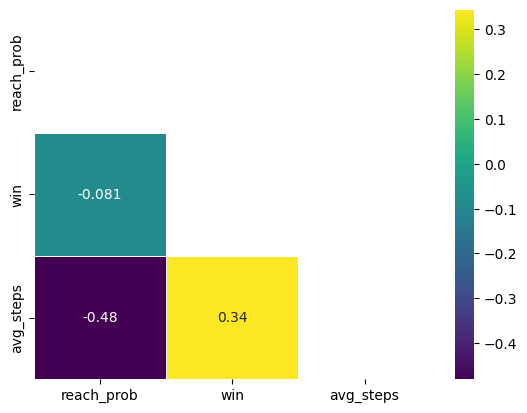

In [13]:
result_df = analyse_piece_over_all(dfs, 'rook_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
triangle = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=triangle, cmap='viridis', linewidths=0.5)
plt.show()

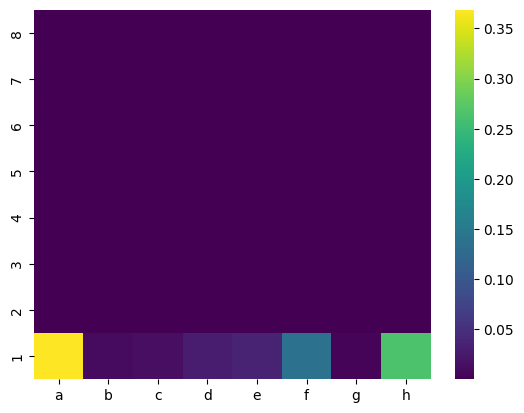

In [14]:
show_chessboard_heatmap('rook_pos')

$=>$ Vidíme, že ve většině případů se věž nehne **[a1, h1] (82.7%)**. Poté ve **12%** je udělaná malá rošáda **[a1, f1]** a ve **2%** se po ní pohne o jedno políčko doleva **[a1, e1]**. V **0.84%** je udělána velká rošáda **[d1, h1]**. Ostatní jsou zanedbatelné.

#### Bishop

Negligible values: Index([ [5, 47], [22, 26], [26, 31], [33, 38],  [5, 18],  [5, 13], [11, 17],
       [14, 16], [12, 16], [12, 13],
       ...
        [4, 37], [50, 60], [35, 52],  [6, 35],  [3, 27], [59, 62], [10, 61],
       [29, 60], [10, 63], [26, 57]],
      dtype='object', name='bishop_pos', length=621)


/home/lukastp/gitlab/chess/notebooks/my_library.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, analyse_piece(df, column_name, threshold_percent)], ignore_index=True)


Negligible values: Index([ [9, 21], [14, 47], [16, 19], [12, 13], [12, 18],  [5, 13],  [5, 18],
        [2, 30], [10, 22],   [1, 2],
       ...
       [27, 42], [32, 42], [27, 39],  [6, 33], [21, 45], [10, 61], [32, 44],
        [0, 17], [15, 49], [30, 63]],
      dtype='object', name='bishop_pos', length=578)
Negligible values: Index([[45], [39],  [3], [30], [28], [34], [42], [37],  [4], [46], [27], [43],
       [53], [63], [40],  [7], [54], [44], [25], [50], [56], [32], [55], [62],
       [49], [41], [59], [48],  [6], [57], [52], [61],  [0], [58], [51], [60]],
      dtype='object', name='bishop_pos')
Negligible values: Index([[20, 33], [23, 29],  [2, 49], [10, 22], [17, 31], [18, 19], [13, 19],
       [12, 18], [26, 47],  [2, 46],
       ...
       [22, 30],  [9, 42], [16, 42], [39, 47], [12, 25], [24, 43],  [9, 39],
       [19, 63], [29, 30],  [9, 35]],
      dtype='object', name='bishop_pos', length=213)
Negligible values: Index([[17, 47],  [2, 30], [26, 59],  [5, 13], [20, 33],  [

,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps
178,[2],['c1'],0.327471,0.469940,0.530060,0.0,18.431370,17.0
128,"[2, 5]","['c1', 'f1']",0.270151,0.445935,0.554065,0.0,12.246080,9.0
234,[5],['f1'],0.135273,0.455385,0.544615,0.0,17.917737,17.0
112,"[2, 26]","['c1', 'c4']",0.124477,0.477059,0.522941,0.0,14.266731,13.0
102,[19],['d3'],0.069104,0.476897,0.523103,0.0,23.559953,23.0


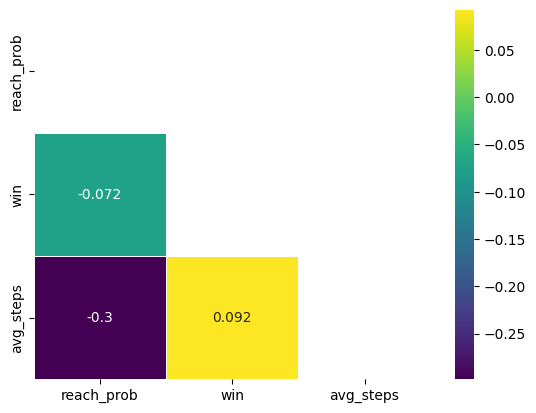

In [15]:
result_df = analyse_piece_over_all(dfs, 'bishop_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
triangle = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=triangle, cmap='viridis', linewidths=0.5)
plt.show()

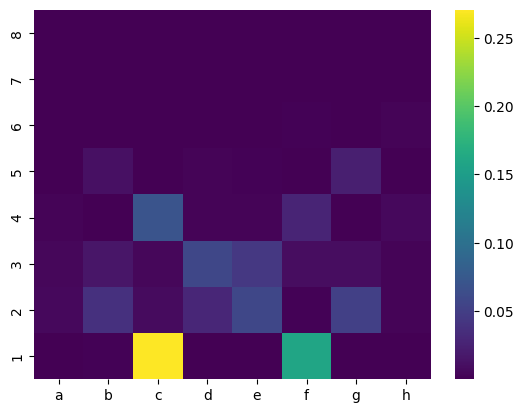

In [16]:
show_chessboard_heatmap('bishop_pos')

#### Knight

Negligible values: Index([ [4, 11], [11, 22],  [1, 17],  [1, 19], [18, 29], [11, 38],  [6, 28],
       [18, 27],  [6, 24], [18, 19],
       ...
       [39, 54],  [2, 56],  [3, 46], [10, 32], [13, 25], [28, 56], [26, 59],
       [23, 42], [18, 40], [20, 34]],
      dtype='object', name='knight_pos', length=994)


/home/lukastp/gitlab/chess/notebooks/my_library.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, analyse_piece(df, column_name, threshold_percent)], ignore_index=True)


Negligible values: Index([[30],  [8], [34], [56], [46], [39], [63],  [2], [43], [53], [42], [25],
       [41],  [9], [50], [32], [14], [44],  [7], [45], [51], [47], [52], [54],
       [55], [49], [48], [59], [61],  [0], [58], [40], [57], [60], [62]],
      dtype='object', name='knight_pos')
Negligible values: Index([ [6, 17], [11, 22],  [6, 21], [17, 18], [11, 23], [12, 22],  [1, 13],
       [12, 16],  [1, 17],  [8, 21],
       ...
       [15, 46], [35, 39],  [0, 15], [19, 56], [24, 61], [43, 44], [28, 45],
        [3, 28], [25, 46],   [2, 8]],
      dtype='object', name='knight_pos', length=919)
Negligible values: Index([[21, 43], [12, 17],  [6, 38],  [1, 44],  [1, 20],  [6, 22], [23, 35],
        [6, 20], [23, 24],  [4, 28],
       ...
       [38, 47],  [4, 20],   [4, 8], [26, 36], [23, 56], [13, 17], [22, 26],
       [30, 33], [15, 26], [21, 45]],
      dtype='object', name='knight_pos', length=277)
Negligible values: Index([[18, 42],  [6, 20],  [4, 11], [21, 36], [21, 50], [21, 29]

,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps
157,[21],['f3'],0.234424,0.476844,0.523156,0.0,21.875871,21.0
132,[1],['b1'],0.214263,0.477897,0.522103,0.0,17.947918,17.0
129,[18],['c3'],0.213300,0.476833,0.523167,0.0,21.730707,21.0
30,"[1, 6]","['b1', 'g1']",0.209486,0.437432,0.562568,0.0,12.159765,9.0
8,"[1, 21]","['b1', 'f3']",0.203504,0.466581,0.533419,0.0,15.008691,13.0


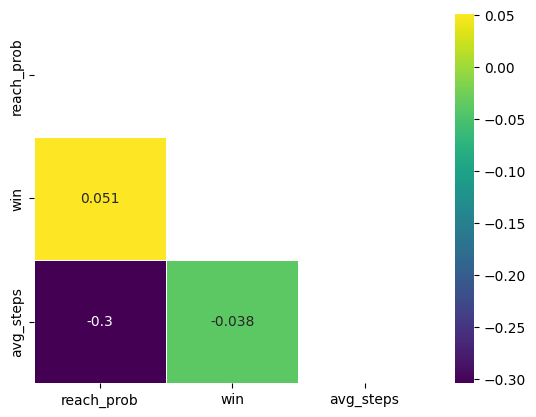

In [17]:
result_df = analyse_piece_over_all(dfs, 'knight_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
triangle = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=triangle, cmap='viridis', linewidths=0.5)
plt.show()

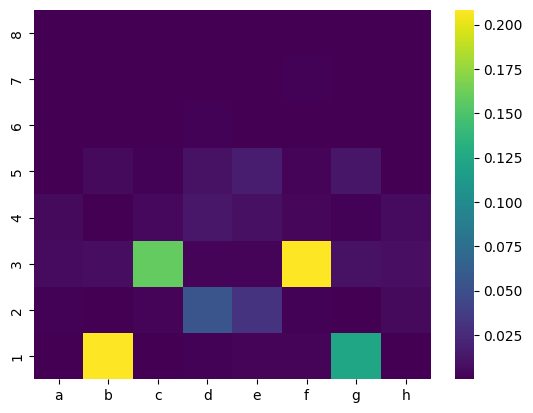

In [18]:
show_chessboard_heatmap('knight_pos')

#### Pawn

Negligible values: Index([  [8, 9, 10, 11, 15, 22, 28], [12, 13, 15, 16, 19, 22, 26],
        [8, 13, 15, 17, 20, 22, 27],  [9, 10, 12, 13, 14, 15, 16],
        [9, 10, 14, 15, 16, 19, 28],  [8, 11, 12, 13, 14, 15, 17],
         [8, 9, 10, 13, 19, 23, 28],   [8, 9, 11, 12, 13, 15, 30],
        [8, 13, 14, 15, 17, 18, 20],   [8, 9, 10, 14, 15, 29, 35],
       ...
       [10, 13, 16, 17, 20, 30, 47], [11, 16, 20, 22, 23, 26, 29],
        [9, 15, 16, 18, 19, 29, 35],   [8, 9, 10, 13, 31, 34, 39],
       [11, 15, 20, 26, 29, 33, 40],  [9, 19, 24, 29, 36, 38, 39],
       [15, 16, 25, 27, 30, 34, 37], [13, 14, 18, 20, 23, 32, 41],
       [17, 19, 23, 24, 26, 28, 29],   [8, 9, 21, 26, 30, 31, 42]],
      dtype='object', name='pawn_pos', length=43885)


/home/lukastp/gitlab/chess/notebooks/my_library.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, analyse_piece(df, column_name, threshold_percent)], ignore_index=True)


Negligible values: Index([ [9, 13, 14, 15, 16, 18, 20, 27],   [8, 9, 10, 13, 14, 15, 28, 43],
         [8, 9, 10, 14, 15, 21, 27, 36],  [8, 13, 14, 15, 18, 19, 25, 28],
         [8, 9, 10, 12, 13, 22, 23, 27],  [8, 10, 11, 14, 17, 20, 23, 29],
         [8, 9, 14, 18, 19, 23, 28, 29],   [8, 9, 11, 14, 15, 18, 28, 29],
         [8, 9, 10, 12, 14, 15, 27, 29],  [9, 10, 13, 14, 16, 23, 27, 36],
       ...
        [8, 12, 13, 14, 19, 23, 26, 34], [10, 15, 16, 19, 20, 25, 29, 38],
       [11, 13, 14, 15, 20, 24, 25, 34],  [8, 10, 14, 15, 16, 20, 27, 29],
       [14, 17, 18, 19, 20, 21, 24, 31],   [8, 9, 19, 23, 26, 28, 30, 44],
        [8, 12, 14, 15, 18, 29, 33, 36], [13, 16, 17, 19, 26, 28, 31, 38],
        [9, 13, 15, 24, 27, 30, 34, 36], [13, 14, 16, 19, 23, 26, 33, 36]],
      dtype='object', name='pawn_pos', length=20819)
Negligible values: Index([  [8, 9, 11, 14, 15, 18, 28, 29],   [8, 9, 14, 15, 21, 26, 27, 28],
        [9, 10, 13, 14, 16, 23, 28, 35],   [8, 9, 10, 13, 15, 22, 27, 28

,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps
533,"[8, 9, 10, 13, 14, 15, 28]","['a2', 'b2', 'c2', 'f2', 'g2', 'h2', 'e4']",0.214579,0.498236,0.501764,0.0,6.072780,5.0
841,"[8, 9, 13, 14, 15]","['a2', 'b2', 'f2', 'g2', 'h2']",0.200098,0.502844,0.497156,0.0,18.075117,17.0
444,"[8, 9, 10, 11, 13, 14, 15]","['a2', 'b2', 'c2', 'd2', 'f2', 'g2', 'h2']",0.153838,0.489463,0.510537,0.0,5.207741,5.0
539,"[8, 9, 10, 13, 14, 15]","['a2', 'b2', 'c2', 'f2', 'g2', 'h2']",0.146030,0.468498,0.531502,0.0,21.023616,23.0
437,"[8, 9, 10, 11, 13, 14, 15, 28]","['a2', 'b2', 'c2', 'd2', 'f2', 'g2', 'h2', 'e4']",0.131259,0.426836,0.573164,0.0,10.597453,7.0


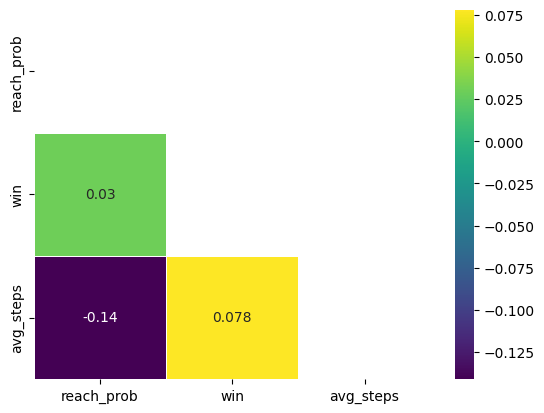

In [19]:
result_df = analyse_piece_over_all(dfs, 'pawn_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
triangle = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=triangle, cmap='viridis', linewidths=0.5)
plt.show()

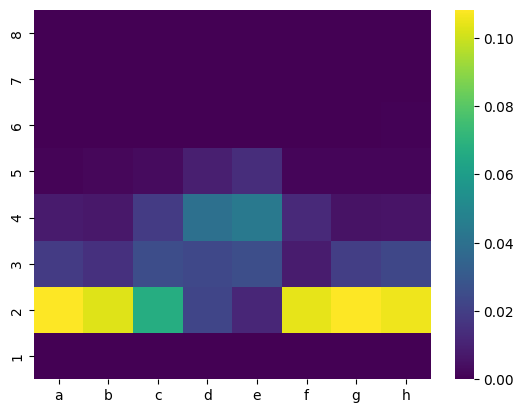

In [ ]:
show_chessboard_heatmap('pawn_pos')